In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

import warnings

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

data_path = "data/predicting-sales-quantity-in-our-dynamic-gridworld"

In [3]:
train = pd.read_csv(f"{data_path}/train.csv")
test = pd.read_csv(f"{data_path}/test.csv")
sup = pd.read_csv(f"{data_path}/supplemental_cities.csv")

In [4]:
train = pd.merge(train, sup, on="city_id")
test = pd.merge(test, sup, on="city_id")

train["type"] = 0
test["type"] = 1
all_data = pd.concat([train, test], axis=0)

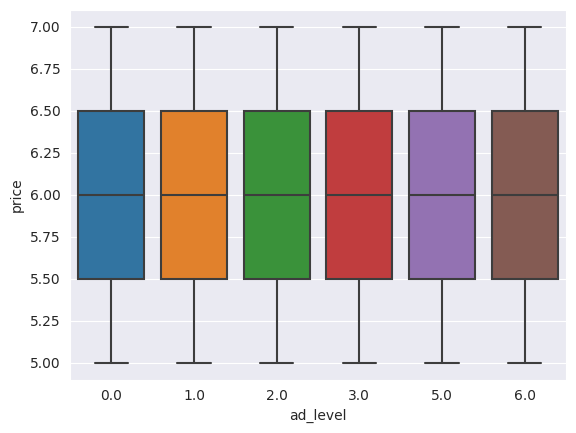

In [23]:
sns.boxplot(y=all_data["price"], x=all_data["ad_level"])
all_data["price"].fillna(6.0, inplace=True)

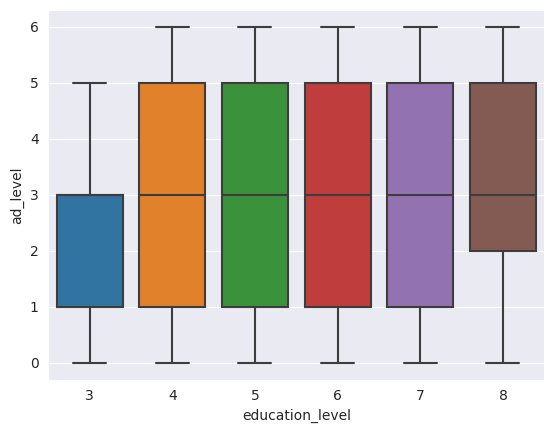

In [24]:
sns.boxplot(y=all_data["ad_level"], x=all_data["education_level"])
all_data["ad_level"].fillna(3.0, inplace=True)

In [ ]:
all_data["population"] = all_data["population"].fillna(train["population"].mean())
all_data["median_income"] = all_data["median_income"].fillna(train["median_income"].mean())

all_data["no_stores"] = all_data.groupby("city_id").transform("size")